In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


In [2]:
import pandas as pd 
import numpy as  np 

url1='/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv'
url2='/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv'
dftrain=pd.read_csv(url1)
dftest=pd.read_csv(url2)

In [3]:
dftrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dftest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
dftrain.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
dftest.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
#train
dftrain['Gender']=dftrain['Gender'].fillna(dftrain['Gender'].mode())
dftrain['Married']=dftrain['Married'].fillna(dftrain['Married'].mode())
dftrain['Self_Employed']=dftrain['Self_Employed'].fillna(dftrain['Self_Employed'].mode())

In [8]:
dftrain['LoanAmount'] = dftrain['LoanAmount'].fillna(dftrain['LoanAmount'].mean())
dftrain['Credit_History'] = dftrain['Credit_History'].fillna(dftrain['Credit_History'].median())

In [9]:


dftrain.dropna(inplace=True)



In [10]:
#testing 

dftest.dropna(inplace=True)

In [11]:


dftrain.drop('Loan_ID', inplace=True, axis = 1)




In [12]:
dftest.drop('Loan_ID', inplace=True, axis = 1)

In [13]:
dftrain.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
dftest.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [15]:
dftrain.Gender = dftrain.Gender.map({'Male':1, 'Female':0})
dftrain.Married = dftrain.Married.map({'Yes':1, 'No':0})
dftrain.Education = dftrain.Education.map({'Graduate':1, 'Not Graduate':0})
dftrain.Self_Employed = dftrain.Self_Employed.map({'Yes':1, 'No':0})
dftrain.Dependents = dftrain.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
dftrain.Property_Area = dftrain.Property_Area.map({'Urban':1, 'Rural':0, 'Semiurban':2})
dftrain.Loan_Status = dftrain.Loan_Status.map({'Y':1, 'N':0})

In [16]:


dftest.Gender = dftest.Gender.map({'Male':1, 'Female':0})
dftest.Married = dftest.Married.map({'Yes':1, 'No':0})
dftest.Education = dftest.Education.map({'Graduate':1, 'Not Graduate':0})
dftest.Self_Employed = dftest.Self_Employed.map({'Yes':1, 'No':0})
dftest.Dependents = dftest.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
dftest.Property_Area = dftest.Property_Area.map({'Urban':1, 'Rural':0, 'Semiurban':2})



In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

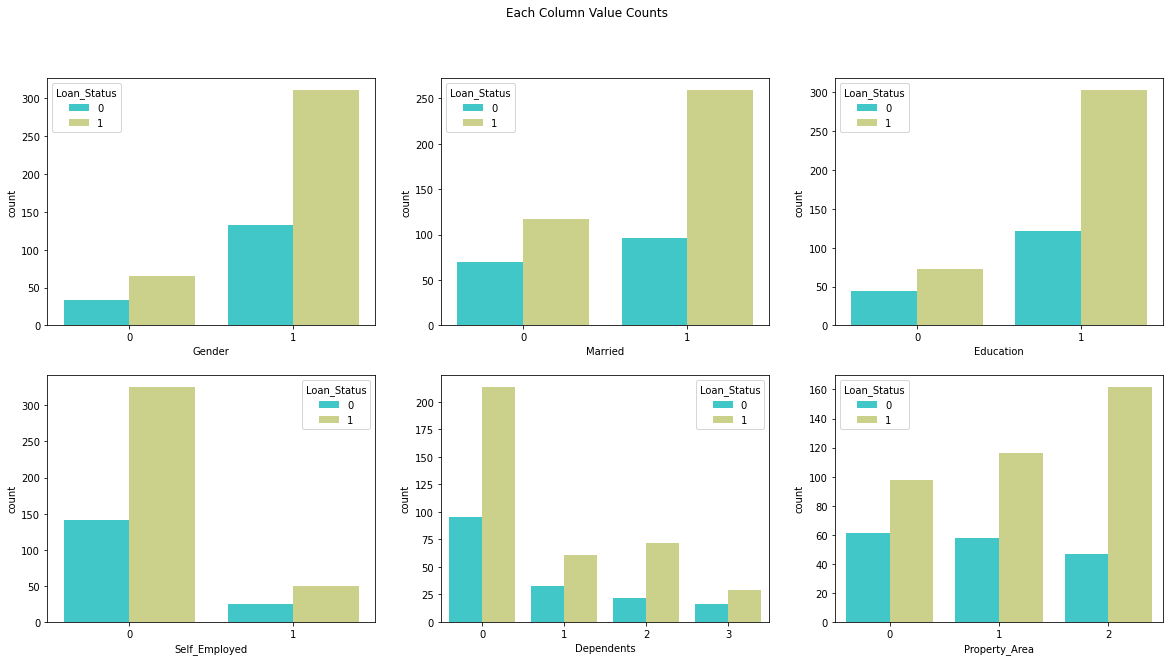

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))

fig.suptitle('Each Column Value Counts')

sns.countplot(dftrain['Gender'], hue = dftrain['Loan_Status'], ax=axes[0, 0], palette='rainbow')
sns.countplot(dftrain['Married'], hue = dftrain['Loan_Status'], ax=axes[0, 1], palette='rainbow')
sns.countplot(dftrain['Education'], hue = dftrain['Loan_Status'], ax=axes[0, 2], palette='rainbow')
sns.countplot(dftrain['Self_Employed'], hue = dftrain['Loan_Status'], ax=axes[1, 0], palette='rainbow')
sns.countplot(dftrain['Dependents'], hue = dftrain['Loan_Status'], ax=axes[1, 1], palette='rainbow')
sns.countplot(dftrain['Property_Area'], hue = dftrain['Loan_Status'], ax=axes[1, 2], palette='rainbow')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [20]:


target= dftrain.drop('Loan_Status', axis = 1)
data= dftrain['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(target, data, test_size = 0.3, random_state = 0)



In [21]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

y_predict = RF.predict(x_test)


#Classification Report
print(classification_report(y_test, y_predict))

# Accuracy score
RF_score = accuracy_score(y_predict,y_test)
print(f"Accurate {round(RF_score*100,2)}%")

              precision    recall  f1-score   support

           0       0.95      0.40      0.57        47
           1       0.80      0.99      0.89       116

    accuracy                           0.82       163
   macro avg       0.88      0.70      0.73       163
weighted avg       0.85      0.82      0.80       163

Accurate 82.21%


In [22]:


Loan_Status_Validation=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Loan_Status_Validation



,y_test,prediction
433,1,1
178,1,1
151,1,1
518,0,1
101,1,1
...,...,...
585,0,1
200,1,1
404,0,1
484,1,1


In [23]:


y_test_predict = RF.predict(dftest)



In [24]:


Loan_Status_Prediction=pd.DataFrame({'y_test_predict':y_test_predict})
Loan_Status_Prediction



,y_test_predict
0,1
1,1
2,1
3,1
4,1
...,...
284,1
285,1
286,1
287,1


Completed 